In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

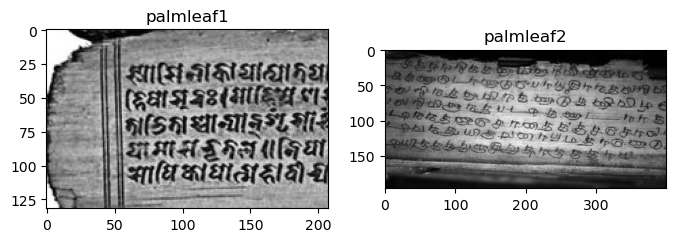

In [2]:
plt.figure(figsize=[8,14])
plt.subplot(121)
img_1 = plt.imread('palmleaf1.png')
plt.imshow(img_1, cmap='gray')
plt.title("palmleaf1")
plt.subplot(122)
img_2 = plt.imread('palmleaf2.png')
plt.imshow(img_2, cmap='gray')
plt.title("palmleaf2");

In [3]:
img_1 = np.array(img_1*255,dtype="int")
img_2 = np.array(img_2*255,dtype="int")

In [4]:
# This function takes an image as input and returns the histogram of the image
def histogram(img):
    hist = np.zeros(256, dtype=int)
    h, w = np.shape(img)
    for i in range(h):
        for j in range(w):
            hist[int(img[i][j])] += 1
    return hist

In [5]:
print(max(img_2.reshape(-1,1)))

[125]


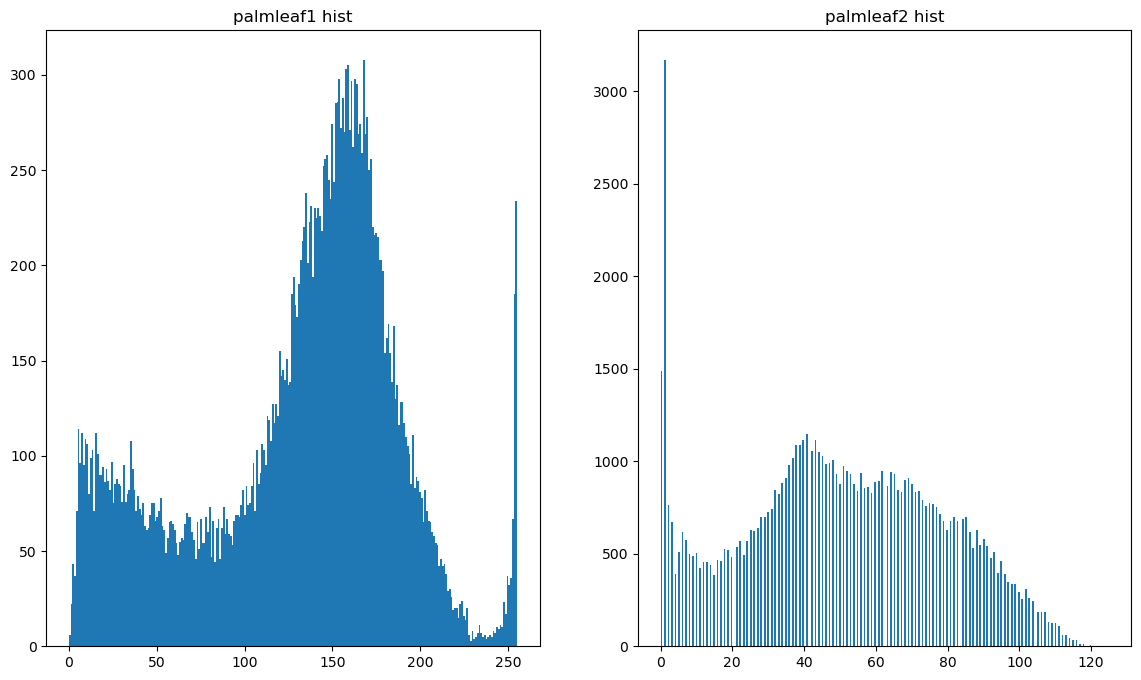

In [6]:
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.hist(img_1.reshape(-1,1),bins=256)
plt.title("palmleaf1 hist")
plt.subplot(122)
plt.hist(img_2.reshape(-1,1),bins=256)
plt.title("palmleaf2 hist");

In [7]:
def otsu_threshold(img):
    binary_img = np.zeros([img.shape[0],img.shape[1]])   
    h, w = np.shape(binary_img) 
    N = h*w     
    uT = np.mean(img)   
    hist = histogram(img)   
    left_sum = 0
    right_sum = uT*N
    N1 = hist[0]
    N2 = N - N1
    threshold = 0
    u1 = left_sum/N1
    u2 = right_sum/N2
    between_class_var = ((u1-uT)**2)*N1 + ((uT-u2)**2)*N2
    for i in range(1,len(hist)-1):
        left_sum += i*hist[i]
        right_sum -= i*hist[i]
        N1 += hist[i]
        N2 -= hist[i]
        u1 = left_sum/N1
        u2 = right_sum/N2
        instant_between_class_var = ((u1-uT)**2)*N1 + ((uT-u2)**2)*N2
        if  instant_between_class_var > between_class_var:
            between_class_var = instant_between_class_var
            threshold = i
    binary_img[np.where(img>threshold)] = 1
    return threshold, binary_img

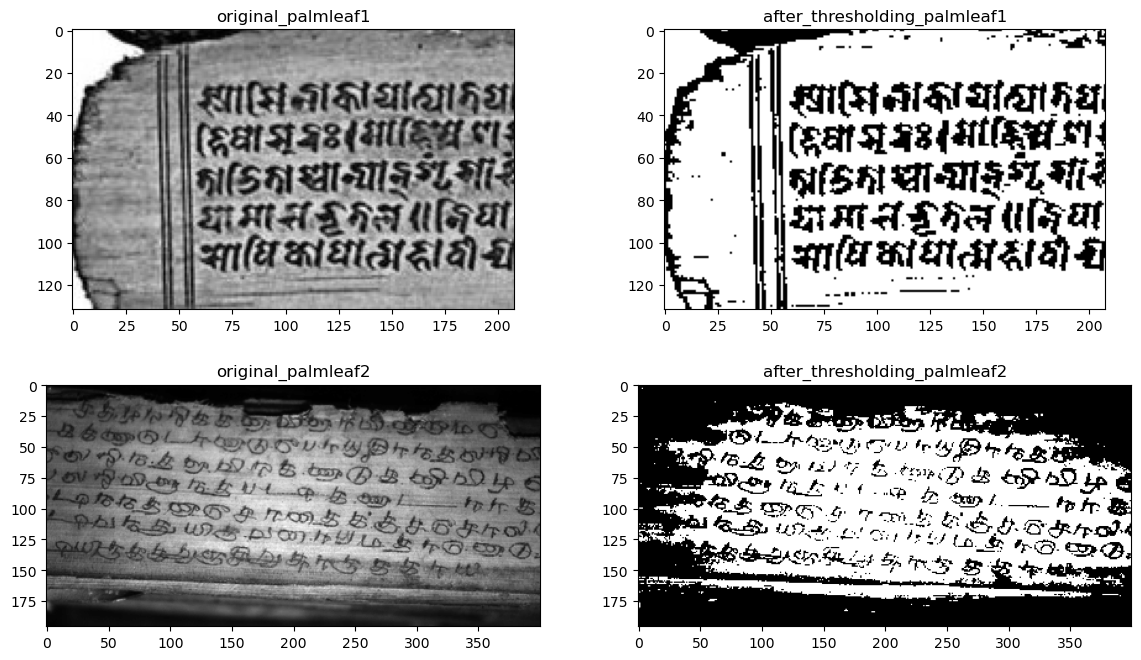

In [8]:
plt.figure(figsize=[14,8])
threshold1, binary_img1 = otsu_threshold(img_1)
plt.subplot(221)
plt.imshow(img_1, cmap='gray')
plt.title("original_palmleaf1")
plt.subplot(222)
plt.imshow(binary_img1, cmap='gray')
plt.title("after_thresholding_palmleaf1")

threshold2, binary_img2 = otsu_threshold(img_2)
plt.subplot(223)
plt.imshow(img_2, cmap='gray')
plt.title("original_palmleaf2")
plt.subplot(224)
plt.imshow(binary_img2, cmap='gray')
plt.title("after_thresholding_palmleaf2");

In [9]:
print("palmleaf1 threshold: {}\npalmleaf2 threshold: {}".format(threshold1,threshold2))

palmleaf1 threshold: 104
palmleaf2 threshold: 50


* All the text in the image is segmented as different from the background except for at some places (edges of the paper, outside of paper and the lines on paper) which were segmented as the class as the text 
* Using global thresholding we cannot account for light intensity variations, that is the reason why the second image was not segmented properly.